# Análisis de Optimización de la función:

<div style="display:flex; align-items:center; justify-content:center; gap:16px;">
   <span style="font-weight:bold; font-size:1.25em; white-space:nowrap;">f(x, y) =</span>
   <img src="../Function.jpg" alt="Visualización de F(x,y)" style="max-width:80%; height:auto;">
</div>

## 1. Configuración Inicial y Importaciones

In [2]:
import os
import datetime
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from scipy.optimize import minimize
import time
import warnings
warnings.filterwarnings('ignore')

# Configuración para mejores gráficas
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 12
sns.set_palette("husl")

# Carpeta para figuras
cwd = os.getcwd()
if os.path.basename(cwd).lower() == 'notebooks':
    PROJECT_ROOT = os.path.dirname(cwd)
else:
    PROJECT_ROOT = cwd

FIGURES_DIR = os.path.join(PROJECT_ROOT, 'figures')
os.makedirs(FIGURES_DIR, exist_ok=True)

def save_fig(name, ext='png', dpi=150, skip_if_exists=True):
    import glob
    if skip_if_exists:
        pattern = os.path.join(FIGURES_DIR, f"{name}_*.{ext}")
        matches = glob.glob(pattern)
        if matches:
            print(f"Figura existente encontrada, no se guarda de nuevo: {matches[0]}")
            return matches[0]
    ts = datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
    filename = f"{name}_{ts}.{ext}"
    path = os.path.join(FIGURES_DIR, filename)
    try:
        plt.savefig(path, dpi=dpi, bbox_inches='tight')
    except Exception as e:
        print(f"Error guardando figura en {path}: {e}")
    return path

## 2. Definición de la Función y sus Derivadas


In [3]:
# 2. Definición de la Función y sus Derivadas
def f(x, y):
    """
    Función objetivo: f(x,y) = arctan(x² + y²) / (1 + x²)
    """
    r = x**2 + y**2
    return np.arctan(r) / (1 + x**2)

def grad_f(x, y):
    """
    Gradiente de la función f(x,y)
    """
    r = x**2 + y**2
    df_dx = (
        2*x*(1 + x**2)/(1 + r**2)
        - 2*x*np.arctan(r)
    ) / (1 + x**2)**2

    df_dy = (
        2*y
    ) / ((1 + x**2)*(1 + r**2))

    return df_dx, df_dy

def hess_f(x, y):
    """
    Matriz Hessiana de f(x,y)
    """
    r = x**2 + y**2
    arctan_r = np.arctan(r)

    d2f_dx2 = (
        2*(1 + x**2)/(1 + r**2)
        - 4*x**2/(1 + r**2)
        - 2*arctan_r
        - 8*x**2*(1 + x**2)*r/(1 + r**2)**2
    ) / (1 + x**2)**2

    d2f_dy2 = (
        2/(1 + r**2)
        - 8*y**2*r/(1 + r**2)**2
    ) / (1 + x**2)

    d2f_dxdy = (
        -8*x*y*r
    ) / ((1 + x**2)*(1 + r**2)**2)

    return np.array([[d2f_dx2, d2f_dxdy], 
                     [d2f_dxdy, d2f_dy2]])

## 3. Análisis Teórico de la Función


In [4]:
print("=== ANÁLISIS EN EL ORIGEN (0,0) ===")
print(f"f(0,0) = {f(0, 0)}")
print(f"∇f(0,0) = {grad_f(0, 0)}")
print(f"H(0,0) = \n{hess_f(0, 0)}")

grad_at_origin = grad_f(0, 0)
norm_grad = np.linalg.norm([grad_at_origin[0], grad_at_origin[1]])
print(f"||∇f(0,0)|| = {norm_grad}")

print("\n=== COMPORTAMIENTO ASINTÓTICO ===")
large_points = [(10, 10), (50, 50), (100, 100)]
for point in large_points:
    x, y = point
    val = f(x, y)
    print(f"f({x},{y}) = {val:.6f}")


=== ANÁLISIS EN EL ORIGEN (0,0) ===
f(0,0) = 0.0
∇f(0,0) = (0.0, 0.0)
H(0,0) = 
[[2. 0.]
 [0. 2.]]
||∇f(0,0)|| = 0.0

=== COMPORTAMIENTO ASINTÓTICO ===
f(10,10) = 0.015503
f(50,50) = 0.000628
f(100,100) = 0.000157


## 4. Visualización de la Función


### 4.1 Gráfica 3D de la Función



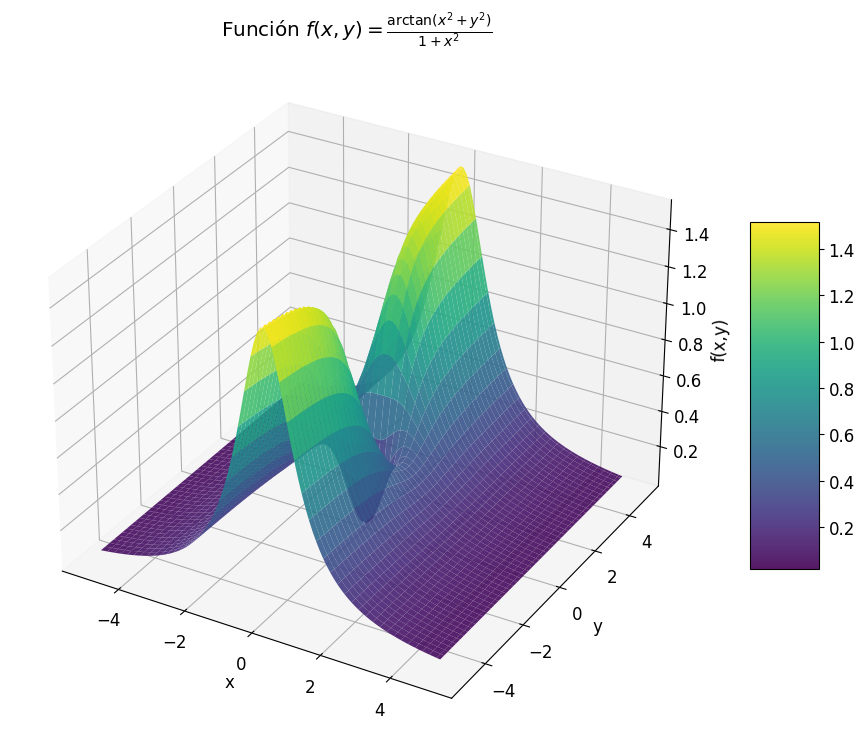

In [7]:
# 4. Visualización de la Función
# 4.1 Gráfica 3D de la Función
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.9, 
                      linewidth=0, antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
#ax.set_title('Función $f(x,y) = \\log(x^2 + y^2 + 1) \\cdot \\arctan(x^2 + y^2)$')
ax.set_title('Función $f(x,y) = \\frac{\\arctan(x^2 + y^2)}{1+x^2}$')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
save_fig('function_3d')
plt.show()

### 4.2 Gráfica del Contorno

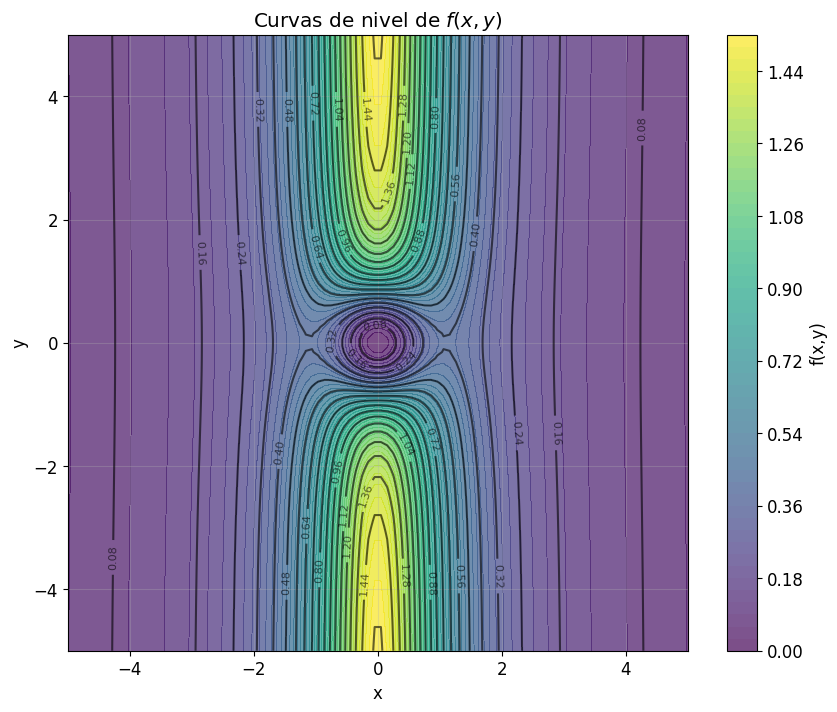

In [8]:
plt.figure(figsize=(10, 8))
contour = plt.contour(X, Y, Z, levels=20, colors='black', alpha=0.6)
plt.clabel(contour, inline=True, fontsize=8)
plt.contourf(X, Y, Z, levels=50, cmap='viridis', alpha=0.7)
plt.colorbar(label='f(x,y)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Curvas de nivel de $f(x,y)$')
plt.grid(True, alpha=0.3)
save_fig('contour_plot')
plt.show()



## 5. Implementación de Algoritmos de Optimización



### 5.1 Gradiente Descendente (Paso Fijo)

In [9]:
def gradient_descent_fixed_step(grad_func, x0, learning_rate=0.1, max_iter=1000, tol=1e-6):
    x = x0.copy()
    trajectory = [x.copy()]
    for i in range(max_iter):
        grad = np.array(grad_func(x[0], x[1]))
        x_new = x - learning_rate * grad
        trajectory.append(x_new.copy())
        if np.linalg.norm(x_new - x) < tol:
            break
        x = x_new
    return x, trajectory

###  5.2 Gradiente Descendente Adaptativo

In [10]:
def gradient_descent_adaptive(grad_func, x0, initial_lr=0.1, max_iter=1000, tol=1e-6):
    x = x0.copy()
    trajectory = [x.copy()]
    lr = initial_lr
    for i in range(max_iter):
        grad = np.array(grad_func(x[0], x[1]))
        x_new = x - lr * grad
        
        # Ajuste adaptativo del learning rate
        if f(x_new[0], x_new[1]) >= f(x[0], x[1]):
            lr *= 0.5  # Reducir learning rate si no hay mejora
        else:
            lr *= 1.05  # Aumentar ligeramente si hay mejora
            
        trajectory.append(x_new.copy())
        if np.linalg.norm(x_new - x) < tol:
            break
        x = x_new
    return x, trajectory


### 5.3 Método de Newton

In [11]:

def newton_method(grad_func, hess_func, x0, max_iter=100, tol=1e-6):
    x = x0.copy()
    trajectory = [x.copy()]
    for i in range(max_iter):
        grad = np.array(grad_func(x[0], x[1]))
        hess = hess_func(x[0], x[1])
        
        # Regularización para evitar singularidad
        try:
            step = np.linalg.solve(hess, -grad)
        except np.linalg.LinAlgError:
            # Si la Hessiana es singular, usar pseudo-inversa
            step = -np.linalg.pinv(hess) @ grad
            
        x_new = x + step
        trajectory.append(x_new.copy())
        if np.linalg.norm(x_new - x) < tol:
            break
        x = x_new
    return x, trajectory

### 5.4 Algoritmo Híbrido

In [12]:
def hybrid_optimization(grad_func, hess_func, x0, max_iter=100, tol=1e-6, newton_threshold=1e-4):
    x = x0.copy()
    trajectory = [x.copy()]
    method_used = []
    
    for i in range(max_iter):
        grad_norm = np.linalg.norm(np.array(grad_func(x[0], x[1])))
        
        if grad_norm < newton_threshold:
            # Usar Newton cerca del óptimo
            hess = hess_func(x[0], x[1])
            try:
                step = np.linalg.solve(hess, -np.array(grad_func(x[0], x[1])))
                method_used.append("Newton")
            except np.linalg.LinAlgError:
                step = -0.1 * np.array(grad_func(x[0], x[1]))  # Fallback a GD
                method_used.append("GD (fallback)")
        else:
            # Usar Gradiente Descendente lejos del óptimo
            step = -0.1 * np.array(grad_func(x[0], x[1]))
            method_used.append("GD")
            
        x_new = x + step
        trajectory.append(x_new.copy())
        if np.linalg.norm(x_new - x) < tol:
            break
        x = x_new
        
    return x, trajectory, method_used

## 6. Experimentos Numéricos

### 6.1 Comparación desde Punto (10, 10)

In [13]:
x0 = np.array([10.0, 10.0])

print("=== OPTIMIZACIÓN DESDE (10, 10) ===")

# Ejecutar todos los algoritmos
x_opt_gd_fixed, traj_gd_fixed = gradient_descent_fixed_step(grad_f, x0)
x_opt_gd_adapt, traj_gd_adapt = gradient_descent_adaptive(grad_f, x0)
x_opt_newton, traj_newton = newton_method(grad_f, hess_f, x0)
x_opt_hybrid, traj_hybrid, methods_hybrid = hybrid_optimization(grad_f, hess_f, x0)

print(f"GD Paso Fijo:   {x_opt_gd_fixed}, f = {f(*x_opt_gd_fixed):.10f}")
print(f"GD Adaptativo:  {x_opt_gd_adapt}, f = {f(*x_opt_gd_adapt):.10f}")
print(f"Newton:         {x_opt_newton}, f = {f(*x_opt_newton):.10f}")
print(f"Híbrido:        {x_opt_hybrid}, f = {f(*x_opt_hybrid):.10f}")

=== OPTIMIZACIÓN DESDE (10, 10) ===
GD Paso Fijo:   [10.2935194   9.99953301], f = 0.0146409067
GD Adaptativo:  [4.46047721e+05 9.98381843e+00], f = 0.0000000000
Newton:         [0.0000000e+00 9.3694505e+13], f = 1.5707963268
Híbrido:        [10.03051282  9.99995079], f = 0.0154098345


### 6.2 Análisis de Convergencia

## 7. Experimento Masivo (441 puntos)

In [15]:
print("=== EXPERIMENTO MASIVO CON 441 PUNTOS INICIALES ===")

# Generar 441 puntos en una cuadrícula 21x21 desde -100 hasta 100
i_values = np.linspace(-100, 100, 21)
j_values = np.linspace(-100, 100, 21)
initial_points = [(i, j) for i in i_values for j in j_values]

print(f"Número total de puntos iniciales: {len(initial_points)}")

# Almacenar resultados
results = {
    'GD Paso Fijo': {'success': 0, 'iterations': [], 'time': [], 'final_f': []},
    'GD Adaptativo': {'success': 0, 'iterations': [], 'time': [], 'final_f': []},
    'Newton': {'success': 0, 'iterations': [], 'time': [], 'final_f': []},
    'Híbrido': {'success': 0, 'iterations': [], 'time': [], 'final_f': []}
}

# Umbral para considerar éxito
success_threshold = 1e-6

# Probar cada algoritmo en todos los puntos iniciales
algorithms = {
    'GD Paso Fijo': lambda x0: gradient_descent_fixed_step(grad_f, np.array(x0), max_iter=1000),
    'GD Adaptativo': lambda x0: gradient_descent_adaptive(grad_f, np.array(x0), max_iter=1000),
    'Newton': lambda x0: newton_method(grad_f, hess_f, np.array(x0), max_iter=100),
    'Híbrido': lambda x0: hybrid_optimization(grad_f, hess_f, np.array(x0), max_iter=100)
}

for algo_name, algo_func in algorithms.items():
    print(f"\nProbando {algo_name}...")
    for point in initial_points:
        start_time = time.time()
        try:
            if algo_name == 'Híbrido':
                x_opt, trajectory, methods = algo_func(point)
                iterations = len(trajectory) - 1
            else:
                x_opt, trajectory = algo_func(point)
                iterations = len(trajectory) - 1
            
            end_time = time.time()
            final_f = f(x_opt[0], x_opt[1])
            
            results[algo_name]['iterations'].append(iterations)
            results[algo_name]['time'].append(end_time - start_time)
            results[algo_name]['final_f'].append(final_f)
            
            if final_f < success_threshold:
                results[algo_name]['success'] += 1
                
        except Exception as e:
            # En caso de error, contar como fallo
            results[algo_name]['iterations'].append(1000)
            results[algo_name]['time'].append(10.0)
            results[algo_name]['final_f'].append(100.0)

=== EXPERIMENTO MASIVO CON 441 PUNTOS INICIALES ===
Número total de puntos iniciales: 441

Probando GD Paso Fijo...

Probando GD Adaptativo...

Probando Newton...

Probando Híbrido...


### 7.1 Análisis Estadístico de Resultados

In [16]:
print("=== ANÁLISIS ESTADÍSTICO DE RESULTADOS ===")

for algo_name in results.keys():
    success_rate = results[algo_name]['success'] / len(initial_points) * 100
    avg_iterations = np.mean(results[algo_name]['iterations'])
    avg_time = np.mean(results[algo_name]['time'])
    median_f = np.median(results[algo_name]['final_f'])
    
    print(f"\n{algo_name}:")
    print(f"  Tasa de éxito: {success_rate:.1f}%")
    print(f"  Iteraciones promedio: {avg_iterations:.1f}")
    print(f"  Tiempo promedio: {avg_time:.4f}s")
    print(f"  f(x) final mediana: {median_f:.2e}")

=== ANÁLISIS ESTADÍSTICO DE RESULTADOS ===

GD Paso Fijo:
  Tasa de éxito: 0.2%
  Iteraciones promedio: 594.5
  Tiempo promedio: 0.0045s
  f(x) final mediana: 6.28e-04

GD Adaptativo:
  Tasa de éxito: 57.4%
  Iteraciones promedio: 585.0
  Tiempo promedio: 0.0063s
  f(x) final mediana: 7.90e-12

Newton:
  Tasa de éxito: 4.8%
  Iteraciones promedio: 95.4
  Tiempo promedio: 0.0021s
  f(x) final mediana: 1.57e+00

Híbrido:
  Tasa de éxito: 3.4%
  Iteraciones promedio: 97.7
  Tiempo promedio: 0.0014s
  f(x) final mediana: 1.63e-01


### 7.2 Visualización de Resultados del Experimento Masivo

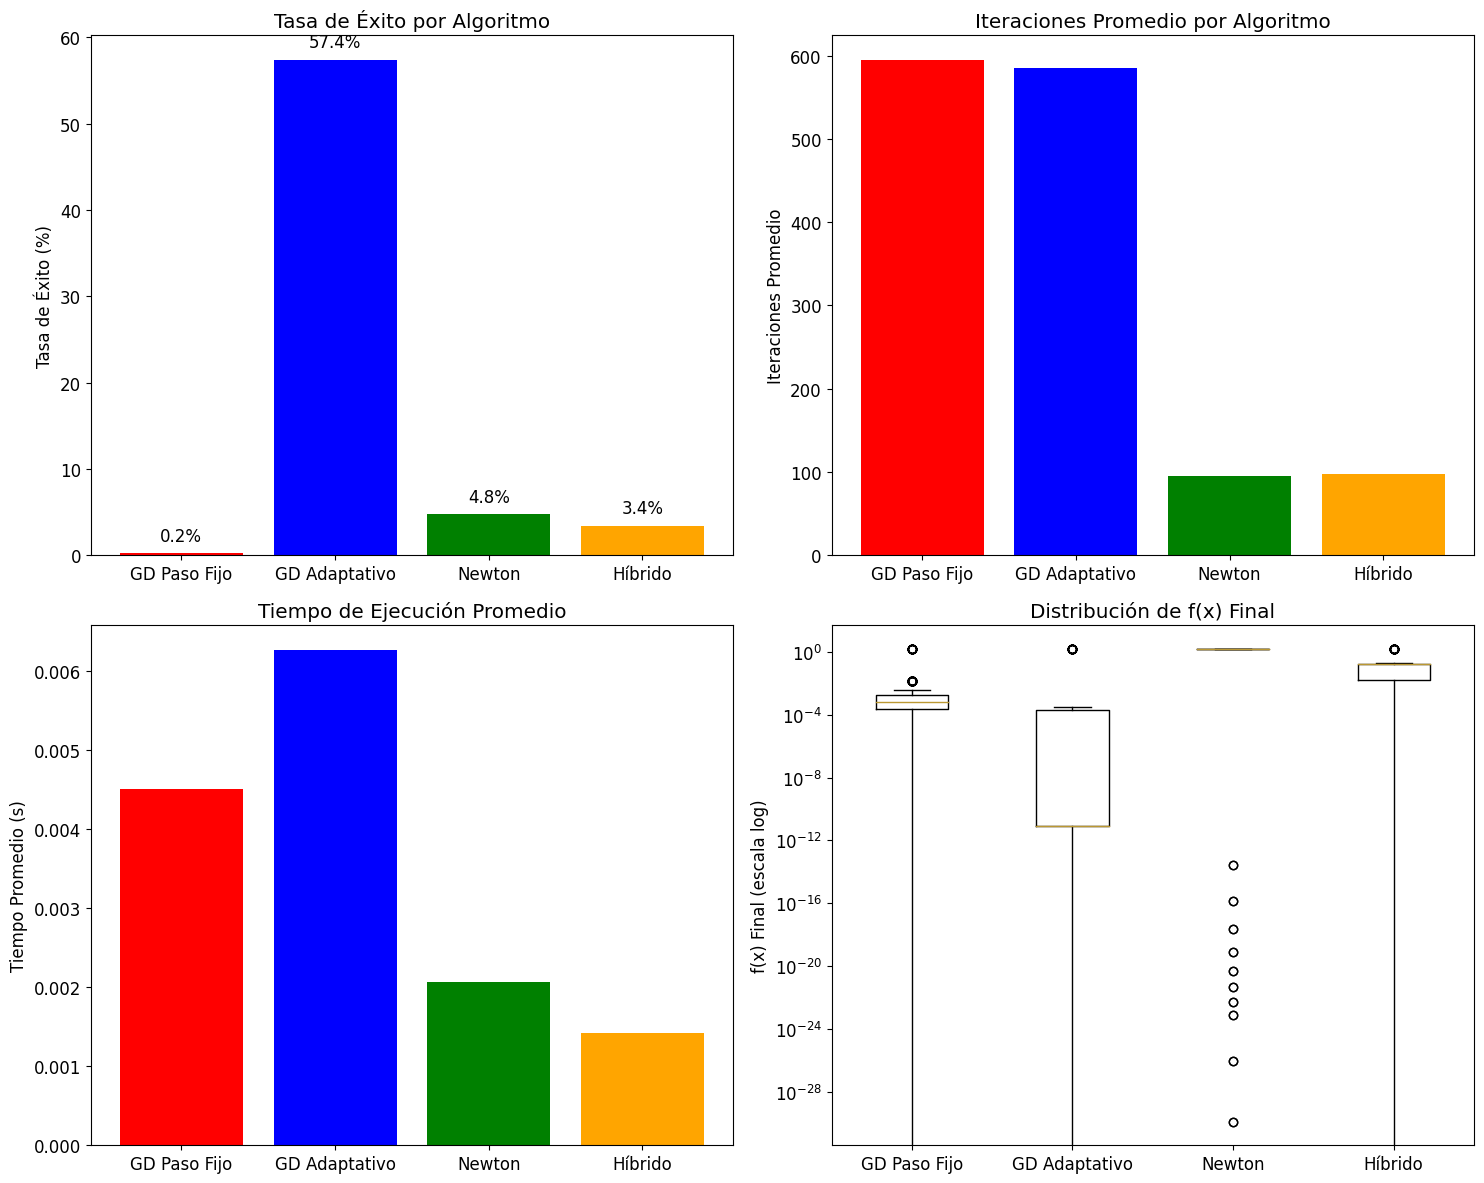

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Tasa de éxito
success_rates = [results[algo]['success']/len(initial_points)*100 for algo in results.keys()]
bars = axes[0, 0].bar(results.keys(), success_rates, color=['red', 'blue', 'green', 'orange'])
axes[0, 0].set_ylabel('Tasa de Éxito (%)')
axes[0, 0].set_title('Tasa de Éxito por Algoritmo')
for bar, rate in zip(bars, success_rates):
    axes[0, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                   f'{rate:.1f}%', ha='center', va='bottom')

# Iteraciones promedio
avg_iterations = [np.mean(results[algo]['iterations']) for algo in results.keys()]
axes[0, 1].bar(results.keys(), avg_iterations, color=['red', 'blue', 'green', 'orange'])
axes[0, 1].set_ylabel('Iteraciones Promedio')
axes[0, 1].set_title('Iteraciones Promedio por Algoritmo')

# Tiempo promedio
avg_times = [np.mean(results[algo]['time']) for algo in results.keys()]
axes[1, 0].bar(results.keys(), avg_times, color=['red', 'blue', 'green', 'orange'])
axes[1, 0].set_ylabel('Tiempo Promedio (s)')
axes[1, 0].set_title('Tiempo de Ejecución Promedio')

# Distribución de f(x) final (boxplot)
final_f_data = [results[algo]['final_f'] for algo in results.keys()]
axes[1, 1].boxplot(final_f_data, labels=results.keys())
axes[1, 1].set_yscale('log')
axes[1, 1].set_ylabel('f(x) Final (escala log)')
axes[1, 1].set_title('Distribución de f(x) Final')

plt.tight_layout()
save_fig('massive_experiment_results')
plt.show()

### 7.3 Diagrama de Iteraciones

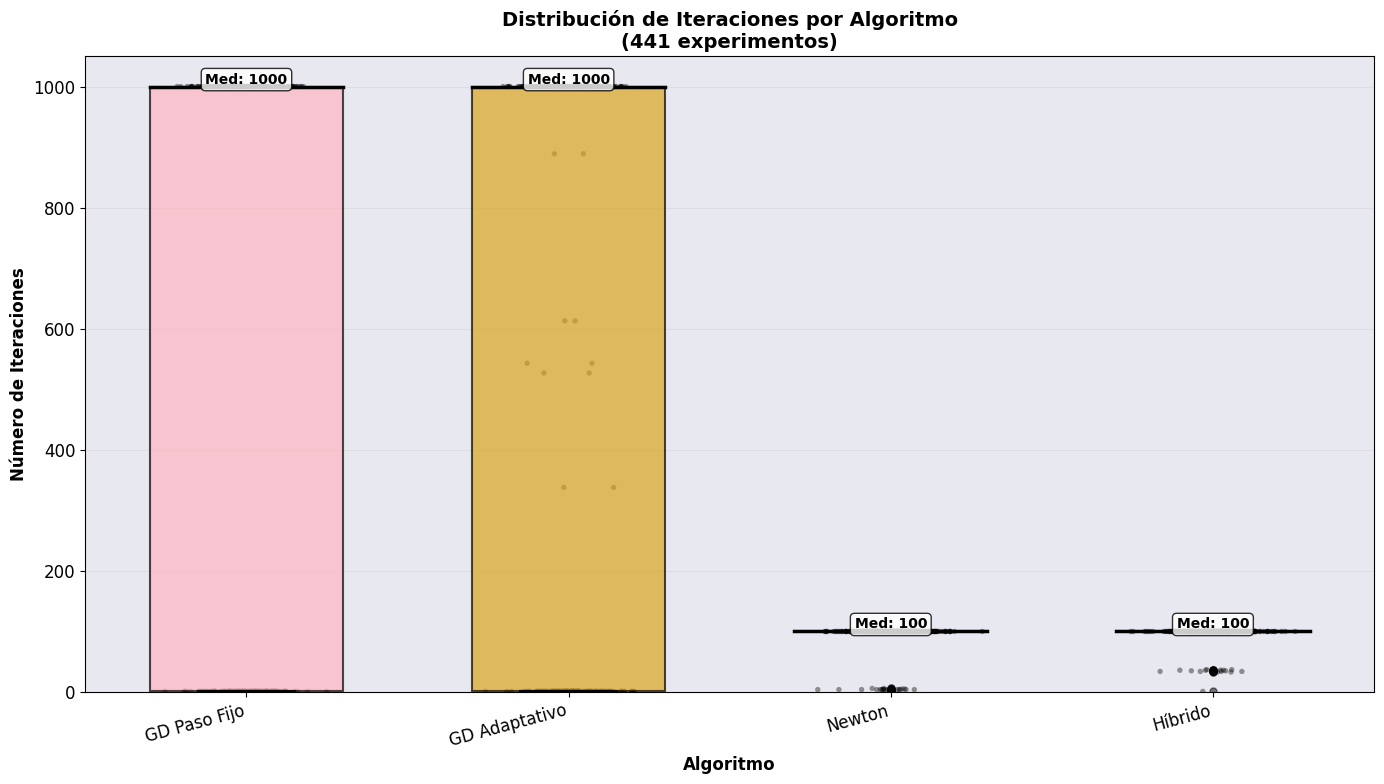


=== ESTADÍSTICAS DE ITERACIONES POR ALGORITMO ===
Algoritmo               Media  Mediana    Min    Max     Q1     Q3    IQR
GD Paso Fijo            594.5   1000.0      1   1000    1.0 1000.0  999.0
GD Adaptativo           585.0   1000.0      1   1000    1.0 1000.0  999.0
Newton                   95.4    100.0      1    100  100.0  100.0    0.0
Híbrido                  97.7    100.0      1    100  100.0  100.0    0.0

=== ANÁLISIS DE OUTLIERS ===

GD Paso Fijo:
  Límite inferior: -1497.5
  Límite superior: 2498.5
  Outliers inferiores: 0
  Outliers superiores: 0

GD Adaptativo:
  Límite inferior: -1497.5
  Límite superior: 2498.5
  Outliers inferiores: 0
  Outliers superiores: 0

Newton:
  Límite inferior: 100.0
  Límite superior: 100.0
  Outliers inferiores: 21
  Outliers superiores: 0

Híbrido:
  Límite inferior: 100.0
  Límite superior: 100.0
  Outliers inferiores: 15
  Outliers superiores: 0



In [18]:
# Preparar datos
iteraciones_data = []
algoritmos_labels = []

for algo_name in results.keys():
    iteraciones = results[algo_name]['iterations']
    iteraciones_data.append(iteraciones)
    algoritmos_labels.append(algo_name)

# Crear figura
fig, ax = plt.subplots(figsize=(14, 8))

# Colores por algoritmo
colores_box = {
    'GD Paso Fijo': '#FFB6C1',      # Rosa
    'GD Adaptativo': '#DAA520',     # Dorado
    'Newton': '#90EE90',            # Verde claro
    'Híbrido': '#5F9EA0'            # Azul-verde (CadetBlue)
}

# Crear boxplot
bp = ax.boxplot(iteraciones_data, 
                labels=algoritmos_labels,
                patch_artist=True,
                widths=0.6,
                showfliers=True,
                flierprops=dict(marker='o', markerfacecolor='black', 
                              markersize=5, linestyle='none', 
                              markeredgecolor='black', alpha=0.5))

# Colorear las cajas
for patch, algo_name in zip(bp['boxes'], algoritmos_labels):
    patch.set_facecolor(colores_box[algo_name])
    patch.set_alpha(0.7)
    patch.set_linewidth(1.5)

# Mejorar líneas del boxplot
for element in ['whiskers', 'fliers', 'means', 'medians', 'caps']:
    plt.setp(bp[element], linewidth=1.5)

plt.setp(bp['medians'], linewidth=2.5, color='black')

# Superponer strip plot (puntos individuales)
for i, (iteraciones, algo_name) in enumerate(zip(iteraciones_data, algoritmos_labels)):
    # Añadir jitter (dispersión horizontal)
    x_jitter = np.random.normal(i+1, 0.08, size=len(iteraciones))
    ax.scatter(x_jitter, iteraciones, 
              alpha=0.4, 
              s=15, 
              color='black',
              edgecolors='none')

# Añadir etiquetas de mediana en las cajas
for i, (iteraciones, algo_name) in enumerate(zip(iteraciones_data, algoritmos_labels)):
    mediana = np.median(iteraciones)
    ax.text(i+1, mediana, f'Med: {mediana:.0f}', 
           ha='center', va='bottom', 
           fontsize=10, fontweight='bold',
           bbox=dict(boxstyle='round,pad=0.3', facecolor='white', 
                    edgecolor='black', alpha=0.8))

# Configurar ejes y etiquetas
ax.set_xlabel('Algoritmo', fontsize=12, fontweight='bold')
ax.set_ylabel('Número de Iteraciones', fontsize=12, fontweight='bold')
ax.set_title('Distribución de Iteraciones por Algoritmo\n(441 experimentos)', 
            fontsize=14, fontweight='bold')

# Rotar etiquetas del eje x
ax.set_xticklabels(algoritmos_labels, rotation=15, ha='right')

# Configurar fondo
ax.set_facecolor('#E8E8F0')
ax.grid(True, alpha=0.3, axis='y', linestyle='-', linewidth=0.5)

# Ajustar límites
ax.set_ylim(bottom=0)

plt.tight_layout()
save_fig('boxplot_iteraciones_real')
plt.show()


print("\n=== ESTADÍSTICAS DE ITERACIONES POR ALGORITMO ===")
print(f"{'Algoritmo':<20} {'Media':>8} {'Mediana':>8} {'Min':>6} {'Max':>6} {'Q1':>6} {'Q3':>6} {'IQR':>6}")
print("="*80)

for algo_name, iteraciones in zip(algoritmos_labels, iteraciones_data):
    media = np.mean(iteraciones)
    mediana = np.median(iteraciones)
    minimo = np.min(iteraciones)
    maximo = np.max(iteraciones)
    q1 = np.percentile(iteraciones, 25)
    q3 = np.percentile(iteraciones, 75)
    iqr = q3 - q1
    
    print(f"{algo_name:<20} {media:8.1f} {mediana:8.1f} {minimo:6.0f} {maximo:6.0f} {q1:6.1f} {q3:6.1f} {iqr:6.1f}")

# Análisis de outliers
print("\n=== ANÁLISIS DE OUTLIERS ===")
for algo_name, iteraciones in zip(algoritmos_labels, iteraciones_data):
    q1 = np.percentile(iteraciones, 25)
    q3 = np.percentile(iteraciones, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    outliers_inf = [x for x in iteraciones if x < lower_bound]
    outliers_sup = [x for x in iteraciones if x > upper_bound]
    
    print(f"\n{algo_name}:")
    print(f"  Límite inferior: {lower_bound:.1f}")
    print(f"  Límite superior: {upper_bound:.1f}")
    print(f"  Outliers inferiores: {len(outliers_inf)}")
    print(f"  Outliers superiores: {len(outliers_sup)}")
    if outliers_sup:
        print(f"  Valores outliers superiores: {sorted(set(outliers_sup))[:10]}")

print("\n" + "="*80)

### 7.4 Mapa de Calor de Tasas de Éxitos

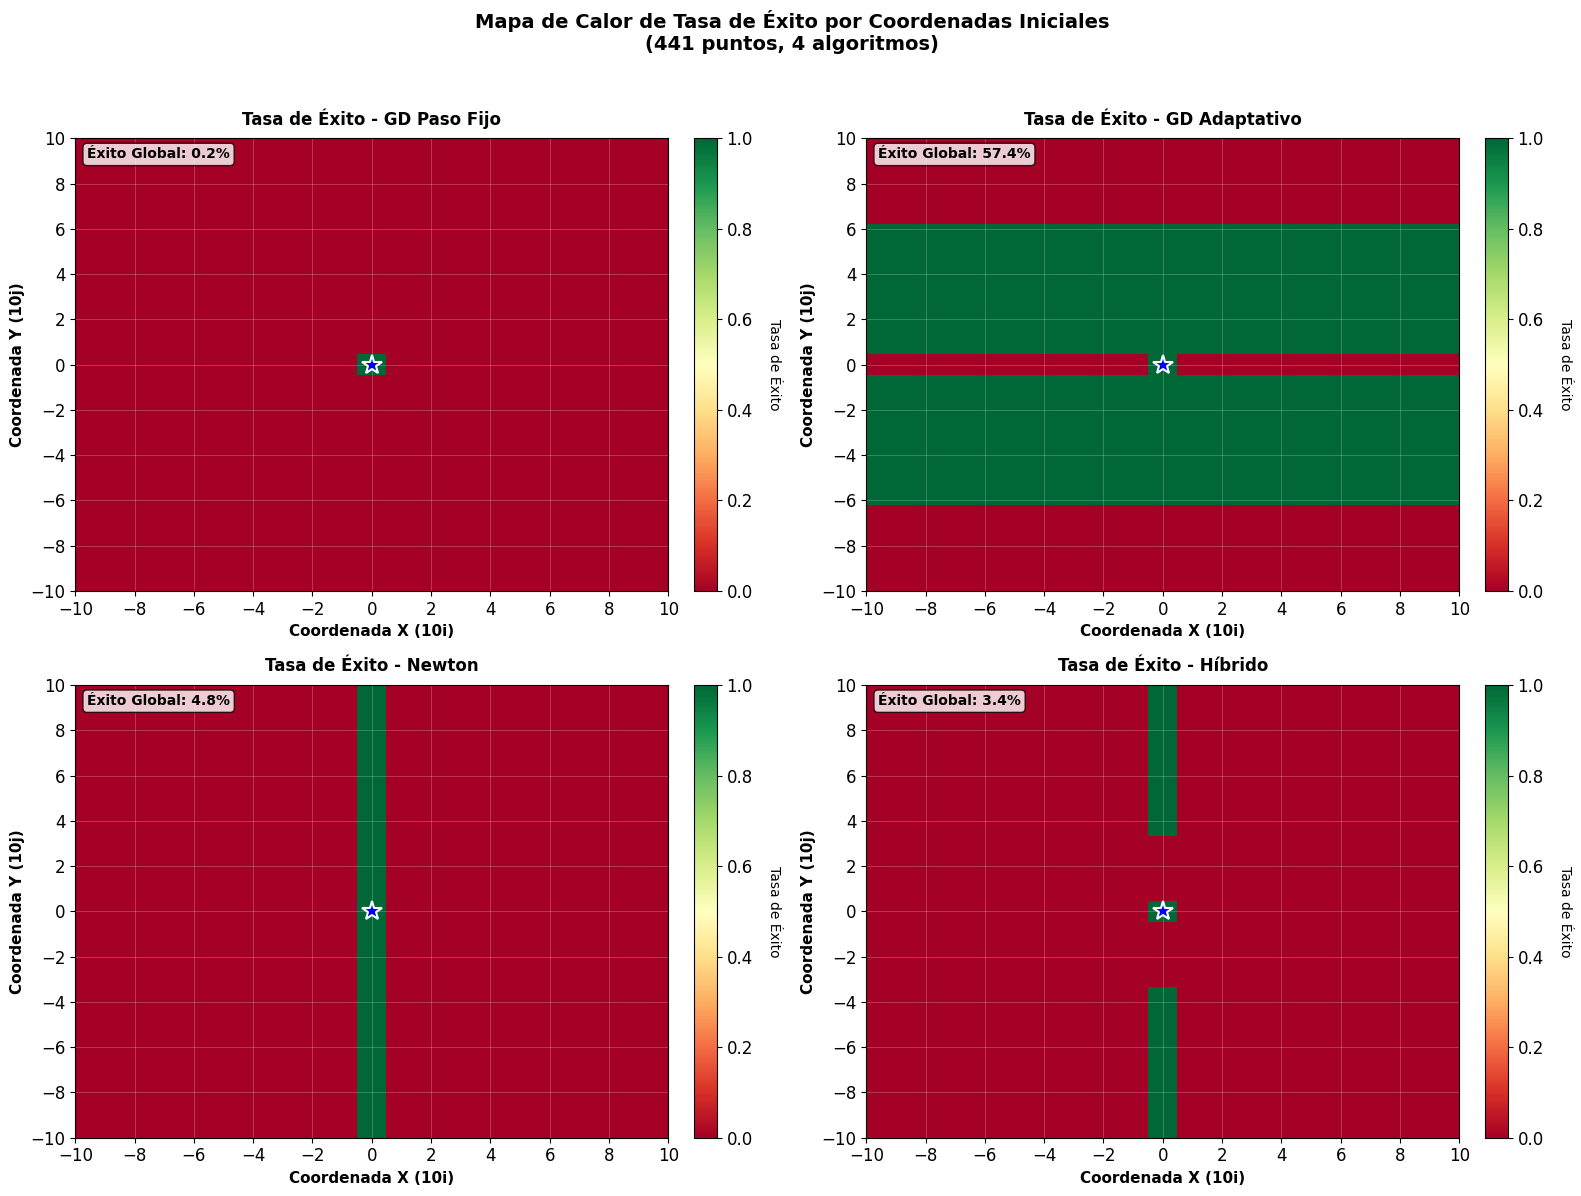


=== ANÁLISIS ESPACIAL DE CONVERGENCIA ===

Éxito por algoritmo y región del plano:

GD Paso Fijo:
  Origen (±1,±1): 1/9 (11.1%)
  Cuadrante I (+,+): 0/81 (0.0%)
  Cuadrante II (-,+): 0/81 (0.0%)
  Cuadrante III (-,-): 0/81 (0.0%)
  Cuadrante IV (+,-): 0/81 (0.0%)

GD Adaptativo:
  Origen (±1,±1): 7/9 (77.8%)
  Cuadrante I (+,+): 45/81 (55.6%)
  Cuadrante II (-,+): 45/81 (55.6%)
  Cuadrante III (-,-): 45/81 (55.6%)
  Cuadrante IV (+,-): 45/81 (55.6%)

Newton:
  Origen (±1,±1): 3/9 (33.3%)
  Cuadrante I (+,+): 0/81 (0.0%)
  Cuadrante II (-,+): 0/81 (0.0%)
  Cuadrante III (-,-): 0/81 (0.0%)
  Cuadrante IV (+,-): 0/81 (0.0%)

Híbrido:
  Origen (±1,±1): 1/9 (11.1%)
  Cuadrante I (+,+): 0/81 (0.0%)
  Cuadrante II (-,+): 0/81 (0.0%)
  Cuadrante III (-,-): 0/81 (0.0%)
  Cuadrante IV (+,-): 0/81 (0.0%)

=== ANÁLISIS POR DISTANCIA AL ORIGEN ===

GD Paso Fijo:
  Dist ≤ 6.000: 1/113 (0.9%)
  6.000 < Dist ≤ 8.246: 0/108 (0.0%)
  8.246 < Dist ≤ 10.198: 0/112 (0.0%)
  Dist > 10.198: 0/108 (0.0%)

GD

In [19]:
# Preparar estructura de datos
# Recrear la cuadrícula 21x21 de puntos iniciales
i_values = np.linspace(-100, 100, 21)
j_values = np.linspace(-100, 100, 21)

# Crear matrices para almacenar tasas de éxito
success_matrices = {}
success_threshold = 1e-6

for algo_name in results.keys():
    # Crear matriz 21x21 para este algoritmo
    success_matrix = np.zeros((21, 21))
    
    # Llenar la matriz con tasas de éxito (0 o 1)
    idx = 0
    for i in range(21):
        for j in range(21):
            if results[algo_name]['final_f'][idx] < success_threshold:
                success_matrix[i, j] = 1.0  # Éxito
            else:
                success_matrix[i, j] = 0.0  # Fallo
            idx += 1
    
    success_matrices[algo_name] = success_matrix

# Crear figura con 4 subplots (2x2)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

# Orden y títulos
algoritmos_orden = ['GD Paso Fijo', 'GD Adaptativo', 'Newton', 'Híbrido']

for idx, algo_name in enumerate(algoritmos_orden):
    ax = axes[idx]
    
    # Crear heatmap
    im = ax.imshow(success_matrices[algo_name], 
                   cmap='RdYlGn',  # Rojo-Amarillo-Verde
                   aspect='auto',
                   origin='lower',
                   extent=[-10, 10, -10, 10],  # Coordenadas escaladas
                   vmin=0, vmax=1,
                   interpolation='nearest')
    
    # Añadir colorbar
    cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label('Tasa de Éxito', rotation=270, labelpad=20, fontsize=10)
    cbar.set_ticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
    
    # Configurar ejes
    ax.set_xlabel('Coordenada X (10i)', fontsize=11, fontweight='bold')
    ax.set_ylabel('Coordenada Y (10j)', fontsize=11, fontweight='bold')
    ax.set_title(f'Tasa de Éxito - {algo_name}', 
                fontsize=12, fontweight='bold', pad=10)
    
    # Añadir cuadrícula
    ax.set_xticks(np.arange(-10, 11, 2))
    ax.set_yticks(np.arange(-10, 11, 2))
    ax.grid(True, color='white', linewidth=0.5, alpha=0.3)
    
    # Marcar el origen
    ax.plot(0, 0, 'b*', markersize=15, markeredgecolor='white', 
           markeredgewidth=1.5, label='Óptimo (0,0)')
    
    # Calcular y mostrar tasa de éxito global
    tasa_global = np.mean(success_matrices[algo_name]) * 100
    ax.text(0.02, 0.98, f'Éxito Global: {tasa_global:.1f}%', 
           transform=ax.transAxes,
           fontsize=10, fontweight='bold',
           verticalalignment='top',
           bbox=dict(boxstyle='round', facecolor='white', 
                    edgecolor='black', alpha=0.8))

# Título general
fig.suptitle('Mapa de Calor de Tasa de Éxito por Coordenadas Iniciales\n(441 puntos, 4 algoritmos)', 
            fontsize=14, fontweight='bold', y=0.995)

plt.tight_layout(rect=[0, 0, 1, 0.98])
save_fig('heatmap_convergencia_real')
plt.show()


print("\n=== ANÁLISIS ESPACIAL DE CONVERGENCIA ===")
print("\nÉxito por algoritmo y región del plano:")

# Definir regiones (cuadrantes + origen)
regiones = {
    'Origen (±1,±1)': lambda x, y: abs(x) <= 1 and abs(y) <= 1,
    'Cuadrante I (+,+)': lambda x, y: x > 1 and y > 1,
    'Cuadrante II (-,+)': lambda x, y: x < -1 and y > 1,
    'Cuadrante III (-,-)': lambda x, y: x < -1 and y < -1,
    'Cuadrante IV (+,-)': lambda x, y: x > 1 and y < -1
}

for algo_name in algoritmos_orden:
    print(f"\n{algo_name}:")
    
    for region_name, condition in regiones.items():
        exitos = 0
        total = 0
        
        idx = 0
        for i_val in i_values:
            for j_val in j_values:
                x_scaled = i_val / 10
                y_scaled = j_val / 10
                
                if condition(x_scaled, y_scaled):
                    total += 1
                    if results[algo_name]['final_f'][idx] < success_threshold:
                        exitos += 1
                idx += 1
        
        if total > 0:
            tasa = (exitos / total) * 100
            print(f"  {region_name}: {exitos}/{total} ({tasa:.1f}%)")

# Definir categorías por distancia al origen (cuartiles)
# Calculamos la distancia de cada punto inicial al origen (usar escalado /10 como en el análisis espacial)
distances = np.array([np.hypot(x/10, y/10) for x, y in initial_points])
p25, p50, p75 = np.percentile(distances, [25, 50, 75])

distance_categories = {
    f'Dist ≤ {p25:.3f}': [idx for idx, d in enumerate(distances) if d <= p25],
    f'{p25:.3f} < Dist ≤ {p50:.3f}': [idx for idx, d in enumerate(distances) if (d > p25 and d <= p50)],
    f'{p50:.3f} < Dist ≤ {p75:.3f}': [idx for idx, d in enumerate(distances) if (d > p50 and d <= p75)],
    f'Dist > {p75:.3f}': [idx for idx, d in enumerate(distances) if d > p75],
}

# Análisis por distancia al origen
print("\n=== ANÁLISIS POR DISTANCIA AL ORIGEN ===")
for algo_name in algoritmos_orden:
    print(f"\n{algo_name}:")
    
    for cat_name, indices in distance_categories.items():
        exitos = sum(1 for i in indices if results[algo_name]['final_f'][i] < success_threshold)
        total = len(indices)
        tasa = (exitos / total) * 100 if total > 0 else 0
        print(f"  {cat_name}: {exitos}/{total} ({tasa:.1f}%)")

print("\n" + "="*80)

## 8. Análisis de Robustez por Distancia al Óptimo

=== ANÁLISIS DE ROBUSTEZ POR DISTANCIA AL ÓPTIMO ===


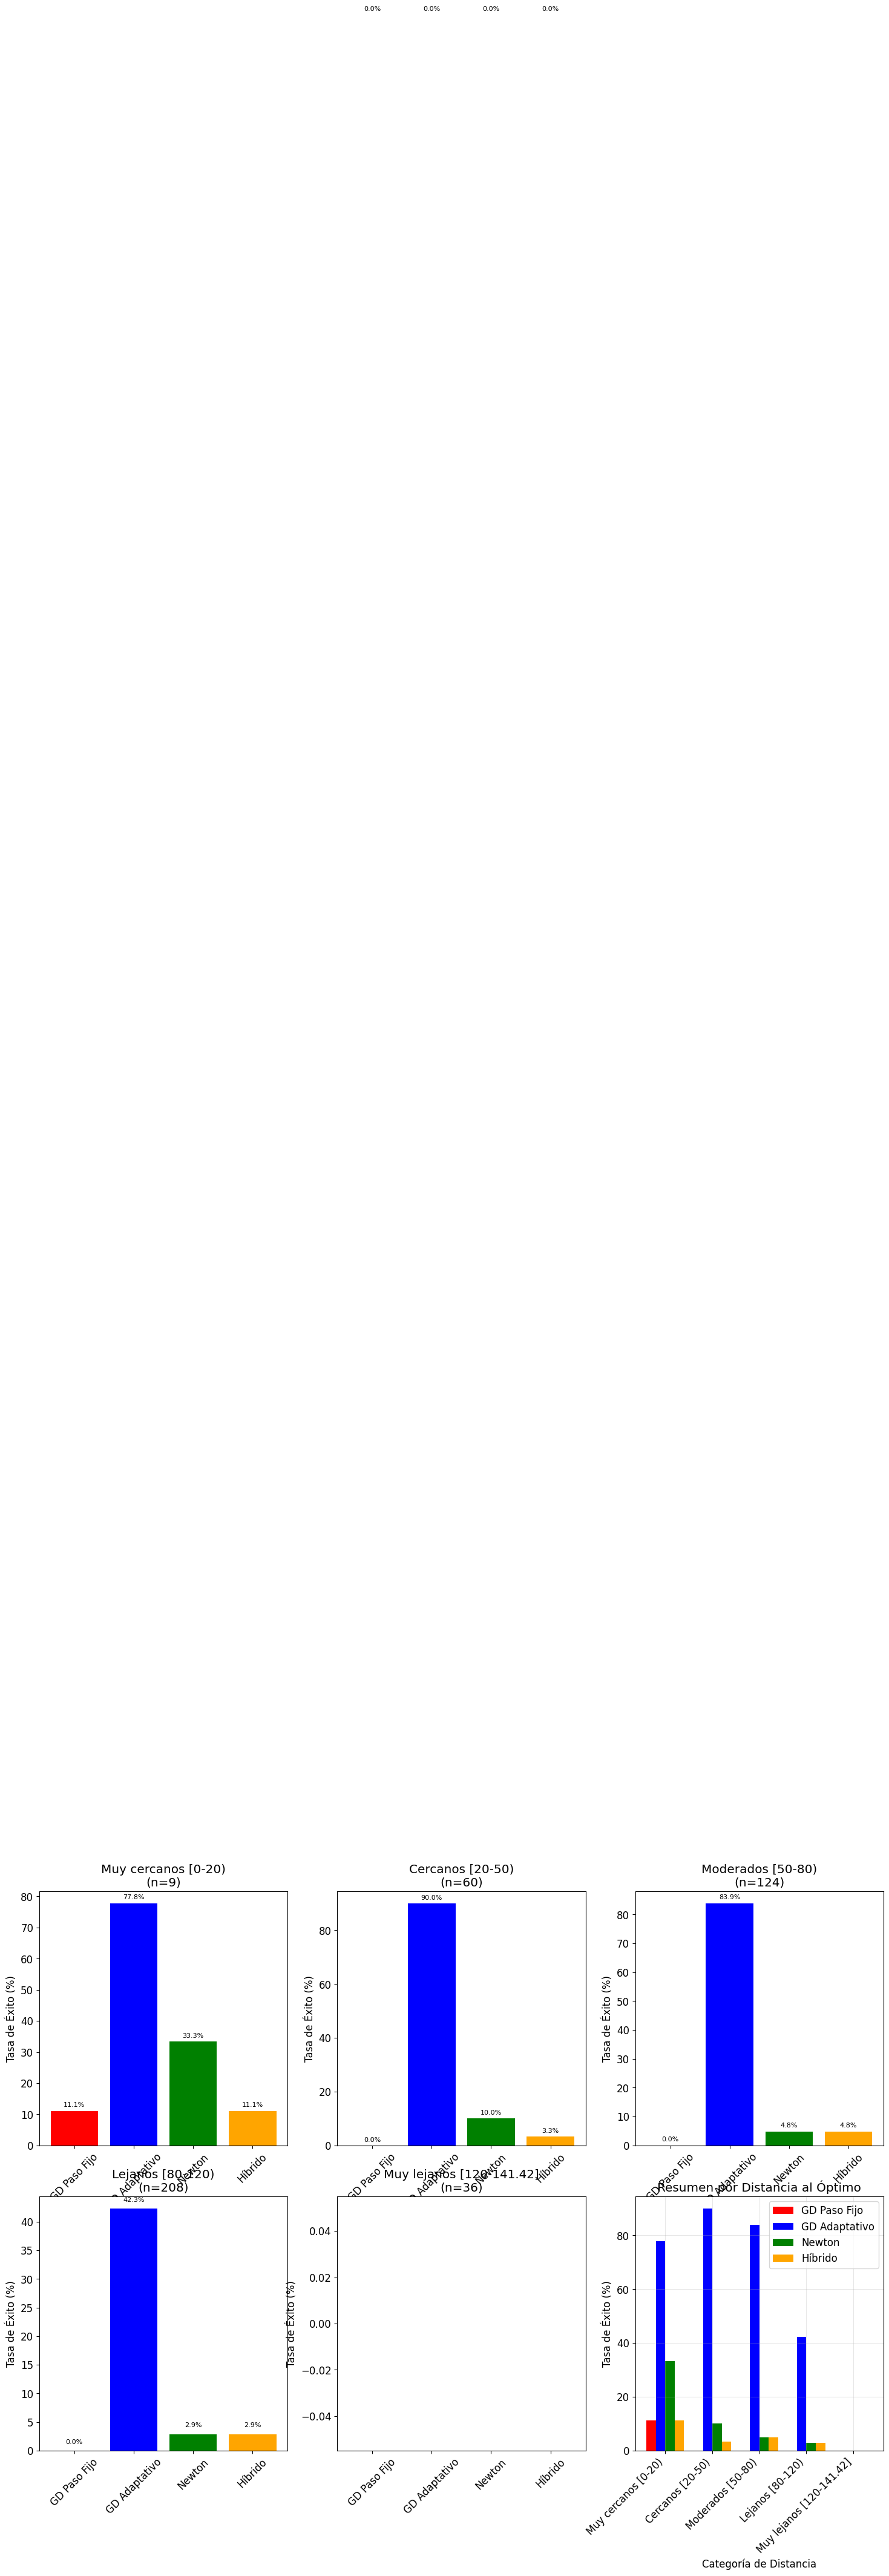

In [20]:
print("=== ANÁLISIS DE ROBUSTEZ POR DISTANCIA AL ÓPTIMO ===")

# Clasificar puntos por distancia al óptimo 
distances = [np.linalg.norm(point) for point in initial_points]
distance_categories = {
    'Muy cercanos [0-20)': [i for i, d in enumerate(distances) if 0 <= d < 20],
    'Cercanos [20-50)': [i for i, d in enumerate(distances) if 20 <= d < 50],
    'Moderados [50-80)': [i for i, d in enumerate(distances) if 50 <= d < 80],
    'Lejanos [80-120)': [i for i, d in enumerate(distances) if 80 <= d < 120],
    'Muy lejanos [120-141.42]': [i for i, d in enumerate(distances) if 120 <= d <= 141.42]
}

# Analizar éxito por categoría
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for idx, (category, indices) in enumerate(distance_categories.items()):
    if idx >= 6:  # Solo mostramos 6 subplots
        break
        
    category_success = []
    for algo_name in results.keys():
        success_count = 0
        for i in indices:
            if results[algo_name]['final_f'][i] < success_threshold:
                success_count += 1
        success_rate = success_count / len(indices) * 100 if indices else 0
        category_success.append(success_rate)
    
    bars = axes[idx].bar(results.keys(), category_success, 
                        color=['red', 'blue', 'green', 'orange'])
    axes[idx].set_title(f'{category}\n(n={len(indices)})')
    axes[idx].set_ylabel('Tasa de Éxito (%)')
    axes[idx].tick_params(axis='x', rotation=45)
    
    for bar, rate in zip(bars, category_success):
        axes[idx].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                      f'{rate:.1f}%', ha='center', va='bottom', fontsize=8)

# Último subplot: Resumen general
summary_data = []
category_names = list(distance_categories.keys())  # Todas las 5 categorías
for algo_name in results.keys():
    algo_rates = []
    for category, indices in distance_categories.items():
        success_count = 0
        for i in indices:
            if results[algo_name]['final_f'][i] < success_threshold:
                success_count += 1
        success_rate = success_count / len(indices) * 100 if indices else 0
        algo_rates.append(success_rate)
    summary_data.append(algo_rates)

x = np.arange(len(category_names))
width = 0.2
colors = ['red', 'blue', 'green', 'orange']
for i, (algo_name, rates) in enumerate(zip(results.keys(), summary_data)):
    axes[5].bar(x + i*width, rates, width, label=algo_name, color=colors[i])
axes[5].set_xlabel('Categoría de Distancia')
axes[5].set_ylabel('Tasa de Éxito (%)')
axes[5].set_title('Resumen por Distancia al Óptimo')
axes[5].set_xticks(x + 1.5*width)
axes[5].set_xticklabels(category_names, rotation=45, ha='right')
axes[5].legend()
axes[5].grid(True, alpha=0.3)

plt.tight_layout()
save_fig('robustness_analysis')
plt.show()

## 9. Análisis de Eficiencia Computacional

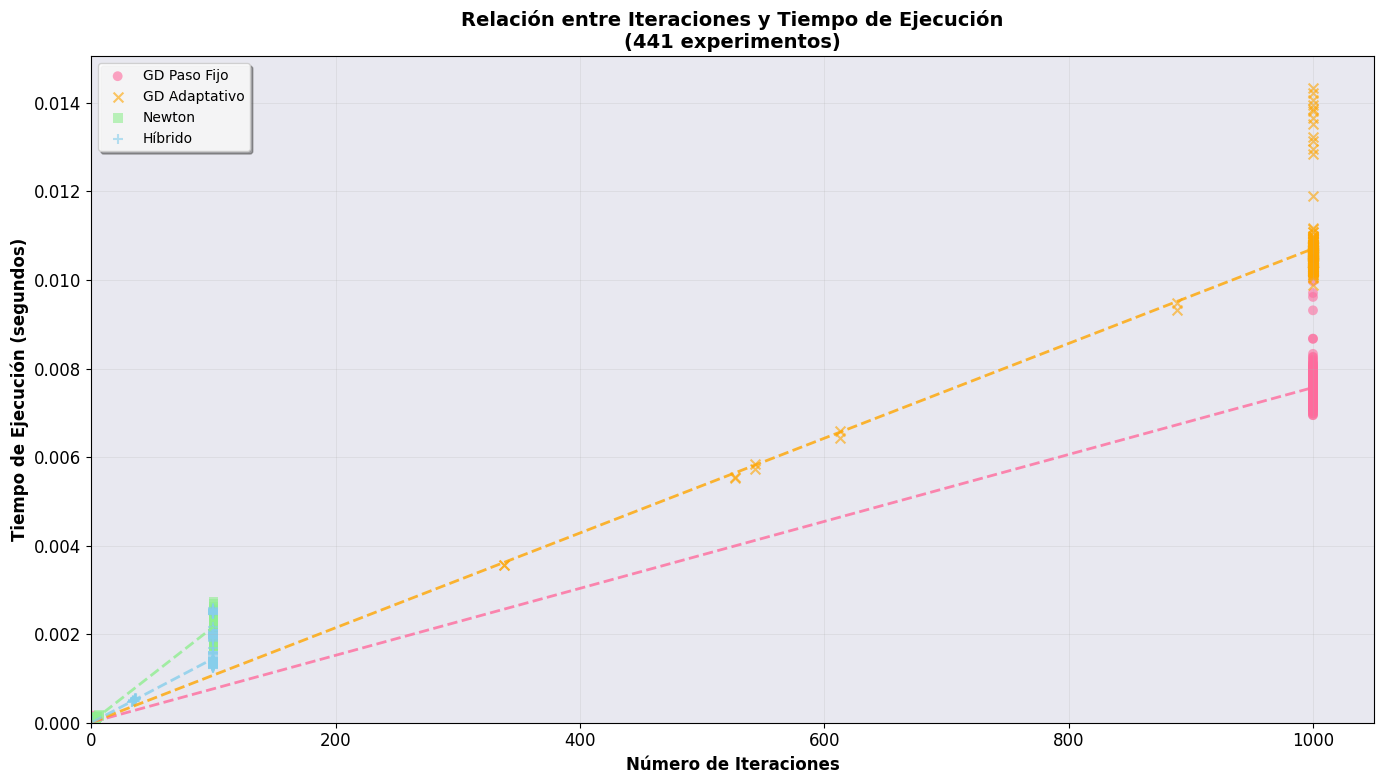


=== CORRELACIÓN ITERACIONES-TIEMPO ===

GD Paso Fijo:
  Correlación: 0.9960
  Tiempo por iteración: 0.0076 ms
  Rango de iteraciones: 1 - 1000
  Rango de tiempo: 0.0000s - 0.0105s

GD Adaptativo:
  Correlación: 0.9949
  Tiempo por iteración: 0.0107 ms
  Rango de iteraciones: 1 - 1000
  Rango de tiempo: 0.0000s - 0.0143s

Newton:
  Correlación: 0.9039
  Tiempo por iteración: 0.0215 ms
  Rango de iteraciones: 1 - 100
  Rango de tiempo: 0.0000s - 0.0027s

Híbrido:
  Correlación: 0.5263
  Tiempo por iteración: 0.0145 ms
  Rango de iteraciones: 1 - 100
  Rango de tiempo: 0.0000s - 0.0026s


In [21]:
fig, ax = plt.subplots(figsize=(14, 8))

# Colores y marcadores por algoritmo
colores = {
    'GD Paso Fijo': '#FF6B9D',      # Rosa
    'GD Adaptativo': '#FFA500',      # Naranja/Amarillo
    'Newton': '#90EE90',             # Verde claro
    'Híbrido': '#87CEEB'             # Azul cielo
}

marcadores = {
    'GD Paso Fijo': 'o',
    'GD Adaptativo': 'x',
    'Newton': 's',
    'Híbrido': '+'
}

# Graficar puntos de dispersión para cada algoritmo
for algo_name in results.keys():
    iteraciones = results[algo_name]['iterations']
    tiempos = results[algo_name]['time']
    
    ax.scatter(iteraciones, tiempos, 
              c=colores[algo_name], 
              marker=marcadores[algo_name],
              alpha=0.6,
              s=50,
              label=algo_name,
              edgecolors='none')
    
    # Calcular y graficar línea de tendencia
    z = np.polyfit(iteraciones, tiempos, 1)
    p = np.poly1d(z)
    x_line = np.linspace(min(iteraciones), max(iteraciones), 100)
    ax.plot(x_line, p(x_line), 
           color=colores[algo_name], 
           linestyle='--', 
           linewidth=2, 
           alpha=0.8)

# Configurar ejes y etiquetas
ax.set_xlabel('Número de Iteraciones', fontsize=12, fontweight='bold')
ax.set_ylabel('Tiempo de Ejecución (segundos)', fontsize=12, fontweight='bold')
ax.set_title('Relación entre Iteraciones y Tiempo de Ejecución\n(441 experimentos)', 
            fontsize=14, fontweight='bold')

# Configurar fondo y grilla
ax.set_facecolor('#E8E8F0')
ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)

# Leyenda
ax.legend(loc='upper left', frameon=True, fontsize=10, 
         fancybox=True, shadow=True, framealpha=0.9)

# Ajustar límites
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)

plt.tight_layout()
save_fig('tiempo_vs_iteraciones_real')
plt.show()


print("\n=== CORRELACIÓN ITERACIONES-TIEMPO ===")
for algo_name in results.keys():
    iteraciones = np.array(results[algo_name]['iterations'])
    tiempos = np.array(results[algo_name]['time'])
    
    # Calcular correlación
    correlacion = np.corrcoef(iteraciones, tiempos)[0, 1]
    
    # Calcular pendiente (tiempo por iteración)
    z = np.polyfit(iteraciones, tiempos, 1)
    tiempo_por_iter = z[0] * 1000  # Convertir a milisegundos
    
    print(f"\n{algo_name}:")
    print(f"  Correlación: {correlacion:.4f}")
    print(f"  Tiempo por iteración: {tiempo_por_iter:.4f} ms")
    print(f"  Rango de iteraciones: {min(iteraciones):.0f} - {max(iteraciones):.0f}")
    print(f"  Rango de tiempo: {min(tiempos):.4f}s - {max(tiempos):.4f}s")

## 10. Análisis de Precisión

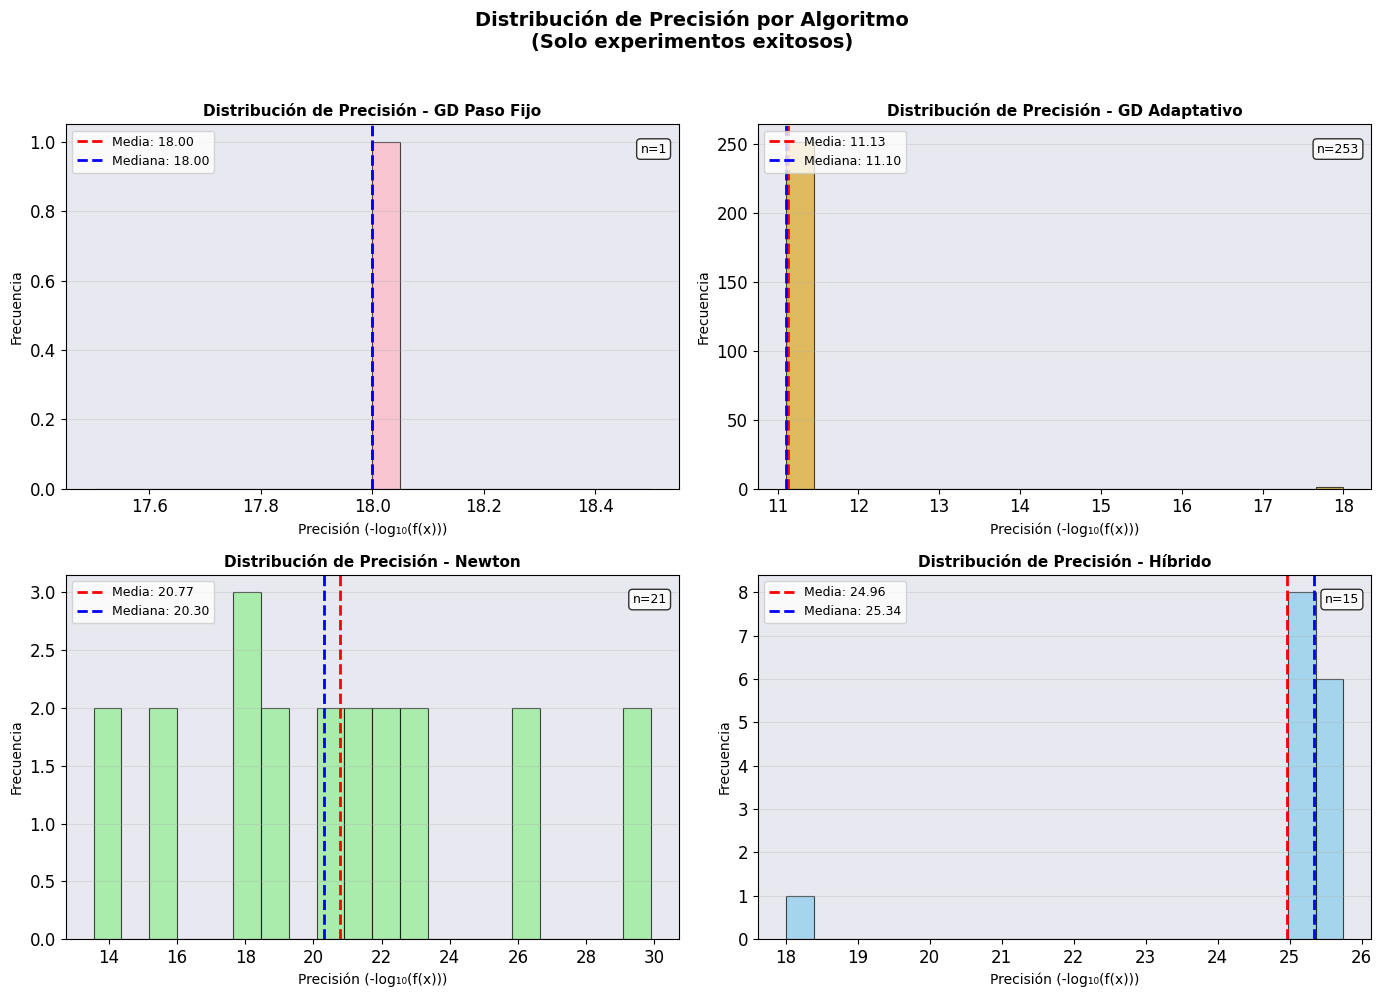


=== ESTADÍSTICAS DE PRECISIÓN (Solo experimentos exitosos) ===
Precisión medida como: -log₁₀(f(x))

Interpretación: Valor más alto = Mayor precisión
  - Precisión 6  → f(x) ≈ 1e-6
  - Precisión 10 → f(x) ≈ 1e-10
  - Precisión 15 → f(x) ≈ 1e-15
  - Precisión 18 → f(x) ≈ 1e-18 (casi exacto)

GD Paso Fijo:
  Experimentos exitosos: 1/441 (0.2%)
  Media: 18.00
  Mediana: 18.00
  Desv. Std: 0.00
  Mínimo: 18.00
  Máximo: 18.00

GD Adaptativo:
  Experimentos exitosos: 253/441 (57.4%)
  Media: 11.13
  Mediana: 11.10
  Desv. Std: 0.43
  Mínimo: 11.10
  Máximo: 18.00

Newton:
  Experimentos exitosos: 21/441 (4.8%)
  Media: 20.77
  Mediana: 20.30
  Desv. Std: 4.49
  Mínimo: 13.55
  Máximo: 29.91

Híbrido:
  Experimentos exitosos: 15/441 (3.4%)
  Media: 24.96
  Mediana: 25.34
  Desv. Std: 1.87
  Mínimo: 18.00
  Máximo: 25.75



In [22]:
# Calcular precisión (-log10(f(x))) solo para casos exitosos
precision_data = {}
success_threshold = 1e-6

for algo_name in results.keys():
    # Filtrar solo experimentos exitosos
    final_f_values = results[algo_name]['final_f']
    exitosos = [f_val for f_val in final_f_values if f_val < success_threshold]
    
    if len(exitosos) > 0:
        # Calcular precisión: -log10(f(x))
        precision = [-np.log10(f_val) if f_val > 0 else 18 for f_val in exitosos]
        precision_data[algo_name] = precision

# Crear figura con 4 subplots (2x2)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# Colores por algoritmo
colores_hist = {
    'GD Paso Fijo': '#FFB6C1',      # Rosa claro
    'GD Adaptativo': '#DAA520',     # Dorado
    'Newton': '#90EE90',            # Verde claro
    'Híbrido': '#87CEEB'            # Azul cielo
}

# Configuración de cada subplot
algoritmos_orden = ['GD Paso Fijo', 'GD Adaptativo', 'Newton', 'Híbrido']

for idx, algo_name in enumerate(algoritmos_orden):
    ax = axes[idx]
    
    if algo_name in precision_data and len(precision_data[algo_name]) > 0:
        precision = precision_data[algo_name]
        media = np.mean(precision)
        mediana = np.median(precision)
        
        # Crear histograma
        n, bins, patches = ax.hist(precision, bins=20, 
                                   color=colores_hist[algo_name], 
                                   edgecolor='black', 
                                   alpha=0.7,
                                   linewidth=0.8)
        
        # Líneas de media y mediana
        ax.axvline(media, color='red', linestyle='--', linewidth=2, 
                  label=f'Media: {media:.2f}')
        ax.axvline(mediana, color='blue', linestyle='--', linewidth=2, 
                  label=f'Mediana: {mediana:.2f}')
        
        # Títulos y etiquetas
        ax.set_title(f'Distribución de Precisión - {algo_name}', 
                    fontsize=11, fontweight='bold')
        ax.set_xlabel('Precisión (-log₁₀(f(x)))', fontsize=10)
        ax.set_ylabel('Frecuencia', fontsize=10)
        ax.legend(fontsize=9, loc='upper left')
        ax.grid(True, alpha=0.3, axis='y')
        ax.set_facecolor('#E8E8F0')
        
        # Información adicional
        n_exitosos = len(precision)
        ax.text(0.98, 0.95, f'n={n_exitosos}', 
               transform=ax.transAxes,
               fontsize=9, verticalalignment='top', horizontalalignment='right',
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    else:
        # Si no hay experimentos exitosos
        ax.text(0.5, 0.5, f'{algo_name}\n\nSin experimentos exitosos', 
               transform=ax.transAxes,
               fontsize=12, ha='center', va='center',
               bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.5))
        ax.set_facecolor('#F0F0F0')
        ax.set_xticks([])
        ax.set_yticks([])

# Título general
fig.suptitle('Distribución de Precisión por Algoritmo\n(Solo experimentos exitosos)', 
            fontsize=14, fontweight='bold', y=0.995)

plt.tight_layout(rect=[0, 0, 1, 0.98])
save_fig('histograma_precision_real')
plt.show()


print("\n=== ESTADÍSTICAS DE PRECISIÓN (Solo experimentos exitosos) ===")
print("Precisión medida como: -log₁₀(f(x))")
print("\nInterpretación: Valor más alto = Mayor precisión")
print("  - Precisión 6  → f(x) ≈ 1e-6")
print("  - Precisión 10 → f(x) ≈ 1e-10")
print("  - Precisión 15 → f(x) ≈ 1e-15")
print("  - Precisión 18 → f(x) ≈ 1e-18 (casi exacto)")

for algo_name in algoritmos_orden:
    total_experimentos = len(results[algo_name]['final_f'])
    exitosos = len(precision_data.get(algo_name, []))
    
    print(f"\n{algo_name}:")
    print(f"  Experimentos exitosos: {exitosos}/{total_experimentos} ({exitosos/total_experimentos*100:.1f}%)")
    
    if exitosos > 0:
        precision = precision_data[algo_name]
        print(f"  Media: {np.mean(precision):.2f}")
        print(f"  Mediana: {np.median(precision):.2f}")
        print(f"  Desv. Std: {np.std(precision):.2f}")
        print(f"  Mínimo: {np.min(precision):.2f}")
        print(f"  Máximo: {np.max(precision):.2f}")
    else:
        print(f"  No hay experimentos exitosos para analizar")

print("\n" + "="*60)

## 11. Referencias y Enlaces

### Referencias Utilizadas

1. Nocedal, J., & Wright, S. J. (2006). Numerical Optimization
2. Boyd, S., & Vandenberghe, L. (2004). Convex Optimization
3. Documentación de SciPy: scipy.optimize.minimize
4. Documentación de NumPy: numpy.linalg

### Enlaces de Interés
- Repositorio GitHub: 
- Documentación completa: doc/report.pdf

In [24]:
print("ANÁLISIS COMPLETADO EXITOSAMENTE")
print("="*50)

ANÁLISIS COMPLETADO EXITOSAMENTE
